# Proyecto Final Señales 2 - Sebastian Andres Zabala Saenz

## Editor RGB

###  Adjunto imagen (Gradiente) para mejor visualización del filtro,
### Se puede usar cualquier imagen del dispositivo. 

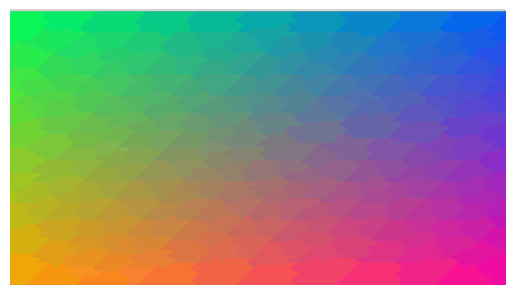

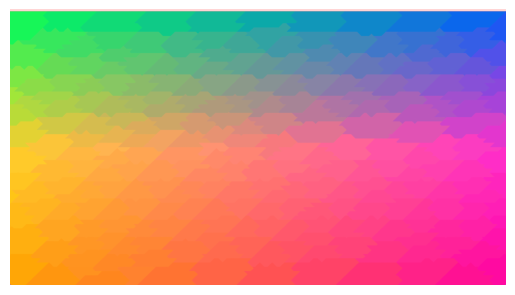

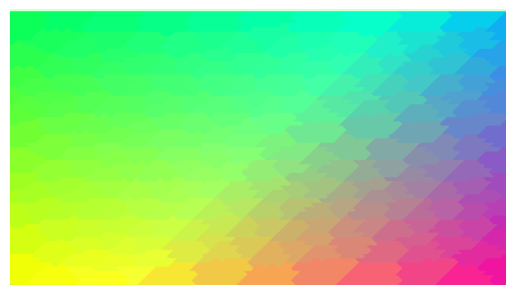

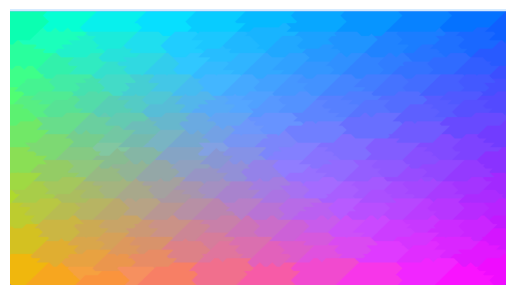

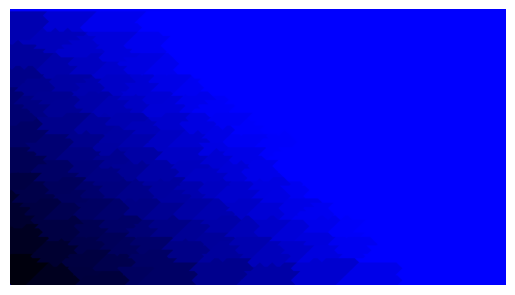

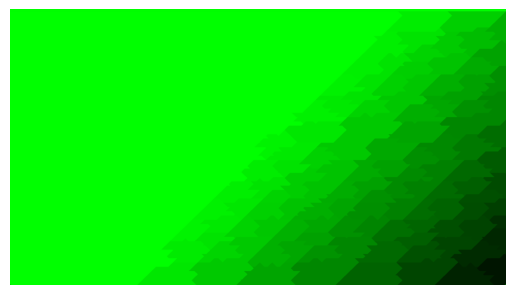

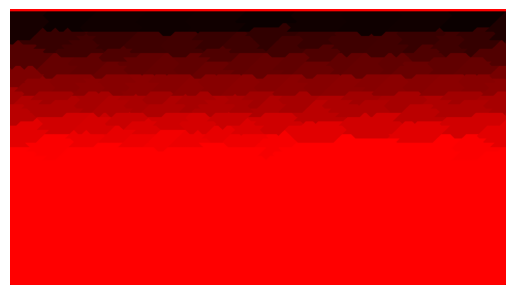

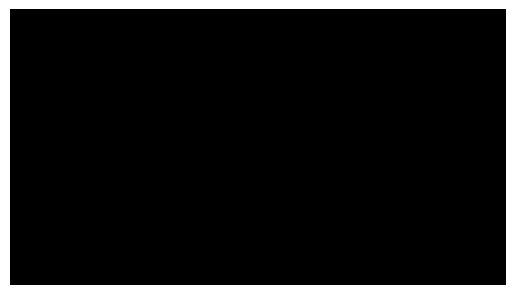

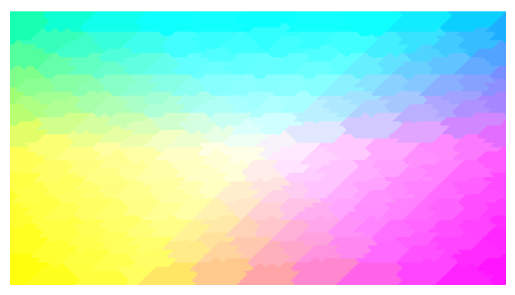

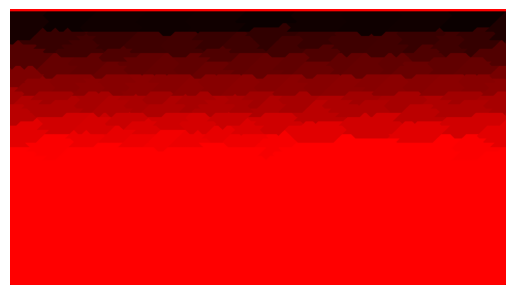

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog, Scale

# Función para cargar la imagen
def cargar_imagen(ruta):
    imagen = Image.open(ruta).convert('RGB')
    return imagen

# Visualizar la imagen con matplotlib
def mostrar_imagen(imagen):
    plt.imshow(imagen)
    plt.axis('off')
    plt.show()

# Transformada FFT para descomposición en frecuencia y aplicación del ajuste RGB
def aplicar_ajuste_frecuencia(imagen, r_factor, g_factor, b_factor):
    img_array = np.array(imagen)  # Convertimos la imagen a un array de numpy

    # Aplicar FFT en cada canal
    img_filtrada = np.zeros_like(img_array, dtype=np.float64)
    for c, factor in zip(range(3), [r_factor, g_factor, b_factor]):
        # Descomponer en frecuencia
        canal_fft = np.fft.fftshift(np.fft.fft2(img_array[..., c]))

        # Ajustar todas las frecuencias del canal con el factor dado
        canal_fft_ajustado = canal_fft * factor

        # Volver al dominio espacial
        img_filtrada[..., c] = np.abs(np.fft.ifft2(np.fft.ifftshift(canal_fft_ajustado)))

    # Escalar y convertir a uint8
    img_filtrada = np.clip(img_filtrada, 0, 255).astype(np.uint8)
    return Image.fromarray(img_filtrada)

# Función para cargar y aplicar ajuste desde la GUI
def cargar_y_aplicar_ajuste_gui():
    ruta = filedialog.askopenfilename()
    if ruta:
        global imagen_original
        imagen_original = cargar_imagen(ruta)
        aplicar_ajuste_rgb_gui()

# Función para ajustar RGB en el dominio de frecuencia desde la GUI
def aplicar_ajuste_rgb_gui():
    if imagen_original:
        r_factor = r_slider.get()
        g_factor = g_slider.get()
        b_factor = b_slider.get()
        imagen_ajustada = aplicar_ajuste_frecuencia(imagen_original, r_factor, g_factor, b_factor)
        mostrar_imagen(imagen_ajustada)

# Interfaz gráfica
root = tk.Tk()
root.title("Editor de Imágenes con Ajuste en Frecuencia")

# Botón para cargar imagen
boton_cargar = tk.Button(root, text="Cargar Imagen", command=cargar_y_aplicar_ajuste_gui)
boton_cargar.pack()

# Sliders para ajustar factores RGB
r_slider = Scale(root, from_=0, to=2, resolution=0.1, orient=tk.HORIZONTAL, label="Factor Rojo")
r_slider.set(1)
r_slider.pack()

g_slider = Scale(root, from_=0, to=2, resolution=0.1, orient=tk.HORIZONTAL, label="Factor Verde")
g_slider.set(1)
g_slider.pack()

b_slider = Scale(root, from_=0, to=2, resolution=0.1, orient=tk.HORIZONTAL, label="Factor Azul")
b_slider.set(1)
b_slider.pack()

# Botón para aplicar ajuste
boton_aplicar_ajuste = tk.Button(root, text="Aplicar Ajuste en Frecuencia", command=aplicar_ajuste_rgb_gui)
boton_aplicar_ajuste.pack()

# Inicializar imagen
imagen_original = None

# Iniciar la interfaz gráfica
root.mainloop()
